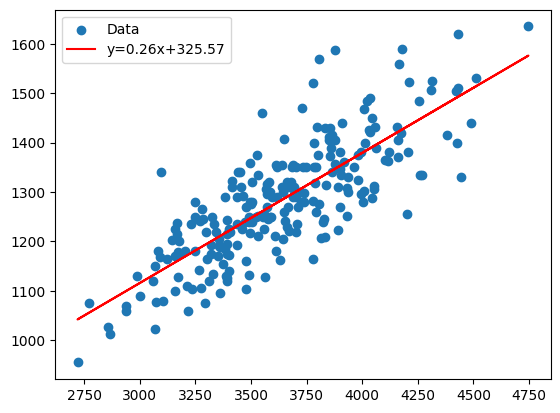

R² Score: 0.6393


In [36]:
#1a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data and Performing Linear Regression
data = pd.read_csv('/content/drive/MyDrive/aiml_dataset/headbrain.csv')
X, Y = data['Head Size(cm^3)'], data['Brain Weight(grams)']
b1, b0 = np.polyfit(X, Y, 1)

# Plotting and R² Calculation
plt.scatter(X, Y, label='Data')
plt.plot(X, b1 * X + b0, color='red', label=f'y={b1:.2f}x+{b0:.2f}')
plt.legend(); plt.show()
print(f"R² Score: {1 - np.sum((Y - (b1 * X + b0))**2) / np.sum((Y - Y.mean())**2):.4f}")


R² Train: 0.87, R² Test: 0.57


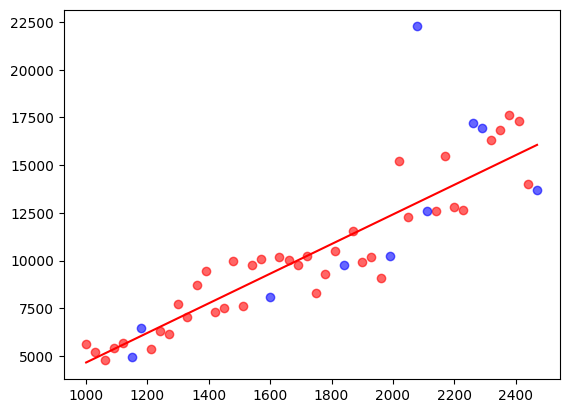

In [37]:
# 1b
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data and split
df = pd.read_csv("/content/drive/MyDrive/aiml_dataset/housing_prices_SLR.csv")
x, y = df[['AREA']], df['PRICE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Train and evaluate
model = LinearRegression().fit(x_train, y_train)
print(f"R² Train: {model.score(x_train, y_train):.2f}, R² Test: {model.score(x_test, y_test):.2f}")

# Plot
plt.scatter(x_train, y_train, color='red', alpha=0.6)
plt.scatter(x_test, y_test, color='blue', alpha=0.6)
plt.plot(x, model.predict(x), color='red')
plt.show()


Coefficients: [-0.47889172  0.09137252  0.90144884], R²: 0.9097


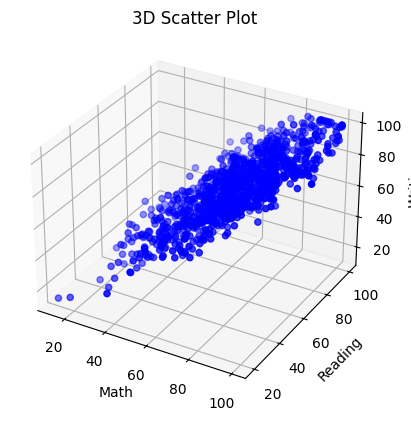

In [46]:
#2a
import numpy as np
import pandas as pd

# Load data and prepare variables
data = pd.read_csv('/content/drive/MyDrive/aiml_dataset/student.csv')
X = np.c_[np.ones(len(data)), data[['Math', 'Reading']]]
Y = data['Writing']
B = np.zeros(X.shape[1])

# Gradient Descent
for _ in range(100000):
    B -= 0.0001 * (X.T @ (X @ B - Y)) / len(Y)

# Evaluation
r2 = 1 - np.sum((Y - X @ B)**2) / np.sum((Y - Y.mean())**2)
print(f"Coefficients: {B}, R²: {r2:.4f}")

#3D Graph
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(data['Math'], data['Reading'], data['Writing'], color='b')
ax.set(xlabel='Math', ylabel='Reading', zlabel='Writing', title='3D Scatter Plot')
plt.show()


In [39]:
#2b
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/aiml_dataset/housing_prices.csv")
X = df.iloc[:, :3].values  # Features: Area, Floor, Room
Y = df.iloc[:, 3].values  # Target: Price

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Train model
model = LinearRegression()
model.fit(X_train, Y_train)

# Results
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R² Train: {model.score(X_train, Y_train):.4f}")
print(f"R² Test: {model.score(X_test, Y_test):.4f}")


Intercept: -3106.4127920034116
Coefficients: [   4.68576316   71.78274093 1894.45529322]
R² Train: 0.9646
R² Test: 0.8606


In [40]:
#3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and preprocess data
df = pd.read_csv("/content/drive/MyDrive/aiml_dataset/breast_cancer.csv")
x = df.iloc[:, 2:]  # Features
y = df.diagnosis     # Target

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Train model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Evaluate
print(f"Train Acc: {model.score(x_train, y_train):.2f}, Test Acc: {model.score(x_test, y_test):.2f}")
cm = confusion_matrix(y_test, model.predict(x_test))
print(f"Confusion Matrix:\n{cm}")
print(classification_report(y_test, model.predict(x_test)))


Train Acc: 1.00, Test Acc: 0.96
Confusion Matrix:
[[62  3]
 [ 2 47]]
              precision    recall  f1-score   support

           B       0.97      0.95      0.96        65
           M       0.94      0.96      0.95        49

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [41]:
#4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess data
df = pd.read_csv("/content/drive/MyDrive/aiml_dataset/breast_cancer.csv").iloc[:, :-1]
x = df.iloc[:, 2:]
y = df.diagnosis

# Baseline analysis
baseline_accuracy = (y == "B").sum() / len(y)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=500)

# Train model
model = GaussianNB().fit(x_train, y_train)

# Evaluate
print("Train Classification Report")
print(classification_report(y_train, model.predict(x_train)))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, model.predict(x_train)))

print("Test Classification Report")
print(classification_report(y_test, model.predict(x_test)))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, model.predict(x_test)))


Baseline Accuracy: 0.63
Train Classification Report
              precision    recall  f1-score   support

           B       0.92      0.97      0.95       278
           M       0.95      0.88      0.91       177

    accuracy                           0.93       455
   macro avg       0.94      0.92      0.93       455
weighted avg       0.93      0.93      0.93       455

Train Confusion Matrix:
 [[270   8]
 [ 22 155]]
Test Classification Report
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        79
           M       0.97      0.94      0.96        35

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Test Confusion Matrix:
 [[78  1]
 [ 2 33]]


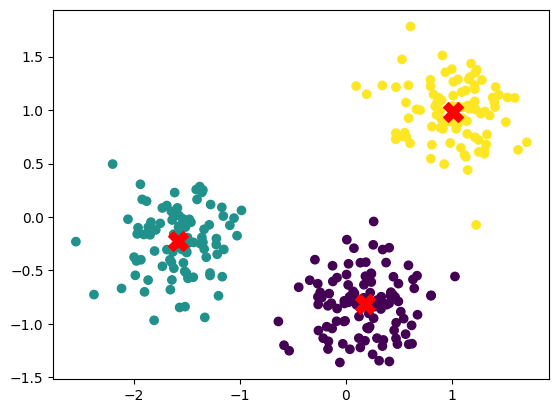

In [42]:
#5a-kmeans
import pandas as pd, matplotlib.pyplot as plt
from sklearn.cluster import KMeans

points = pd.read_csv('/content/drive/MyDrive/aiml_dataset/ch1ex1.csv').values
model = KMeans(n_clusters=3).fit(points)
plt.scatter(points[:, 0], points[:, 1], c=model.labels_)
plt.scatter(*model.cluster_centers_.T, marker='X', s=200, color='red')
plt.show()


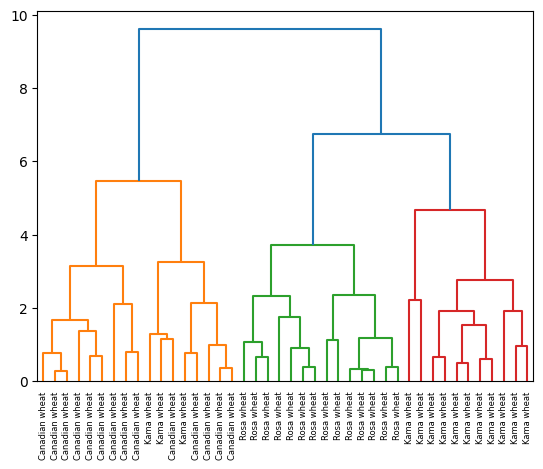

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


In [43]:
#5b-hc
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load data and preprocess
seeds_df = pd.read_csv('/content/drive/MyDrive/aiml_dataset/seeds-less-rows.csv')
varieties = seeds_df.pop('grain_variety')
mergings = linkage(seeds_df.values, method='complete')

# Perform clustering and create cross-tabulation
labels = fcluster(mergings, 6, criterion='distance')
ct = pd.crosstab(pd.Series(labels, name='labels'), pd.Series(varieties, name='varieties'))

# Visualize dendrogram and display cross-tabulation
import matplotlib.pyplot as plt
dendrogram(mergings, labels=varieties.to_numpy(), leaf_rotation=90, leaf_font_size=6), plt.show()
print(ct)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


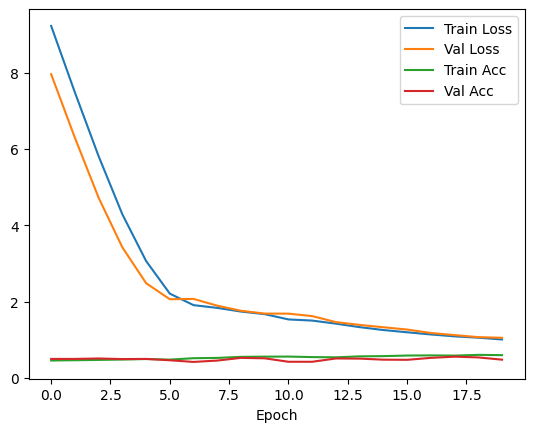

(<matplotlib.legend.Legend at 0x790b8879c100>, Text(0.5, 24.0, 'Epoch'), None)

In [44]:
#6
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd; import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/aiml_dataset/pima-indians-diabetes.csv')
X, y = data.iloc[:, :-1], data.iloc[:, -1]
network = Sequential([Dense(8, activation="relu", input_shape=(X.shape[1],)), Dense(8, activation="relu"), Dense(1, activation="sigmoid")])
network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = network.fit(X, y, epochs=20, batch_size=100, validation_split=0.33, verbose=0)

plt.plot(history.history["loss"], label="Train Loss"), plt.plot(history.history["val_loss"], label="Val Loss")
plt.plot(history.history["accuracy"], label="Train Acc"), plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend(), plt.xlabel("Epoch"), plt.show()
